# Healthcare

## DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Project Task: Week 1

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        • Glucose,• BloodPressure,• SkinThickness,• Insulin,• BMI

In [1]:
# importing the required libraries.
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
os.chdir('E:\Simplilearn_Artificial_Intelligence_DATA_SCIENCE\ML Pramod Assignment\DataScience\Simplilearn DataSet')

In [3]:
df = pd.read_csv('E:\Simplilearn_Artificial_Intelligence_DATA_SCIENCE\ML Pramod Assignment\DataScience\Simplilearn DataSet\Data-Science-Capstone-Projects-master\Project 2\Healthcare - Diabetes\health care diabetes.csv')

In [4]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Perform descriptive analysis.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies                 Right skewed
Glucose                     Right skewed
BloodPressure               Left skewed
SkinThickness               Left skewed
Insulin                     Highly Right skewed
BMI                         Left skewed
DiabetesPedigreeFunction    Right skewed
Age                         Right skewed


In [7]:
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol
df[~df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
df.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


A value of zero does not make sense and thus indicates missing value:

In [9]:
# Lets count the number of 0 present in the columns.
print("Total : ",df[df.Glucose ==0].shape[0])
print(df[df.Glucose ==0].groupby('Outcome')
      ['Glucose'].count())

Total :  5
Outcome
0    3
1    2
Name: Glucose, dtype: int64


In [10]:
print("Total : ",df[df.BloodPressure ==0].shape[0])
print(df[df.BloodPressure ==0].groupby('Outcome')
      ['BloodPressure'].count())

Total :  35
Outcome
0    19
1    16
Name: BloodPressure, dtype: int64


In [11]:
print("Total : ",df[df.SkinThickness ==0].shape[0])
print(df[df.SkinThickness ==0].groupby('Outcome')
      ['SkinThickness'].count())

Total :  227
Outcome
0    139
1     88
Name: SkinThickness, dtype: int64


In [12]:
print("Total : ",df[df.Insulin ==0].shape[0])
print(df[df.Insulin ==0].groupby('Outcome')
      ['Insulin'].count())

Total :  374
Outcome
0    236
1    138
Name: Insulin, dtype: int64


In [13]:
print("Total : ",df[df.BMI ==0].shape[0])
print(df[df.BMI ==0].groupby('Outcome')
      ['BMI'].count())

Total :  11
Outcome
0    9
1    2
Name: BMI, dtype: int64


###### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

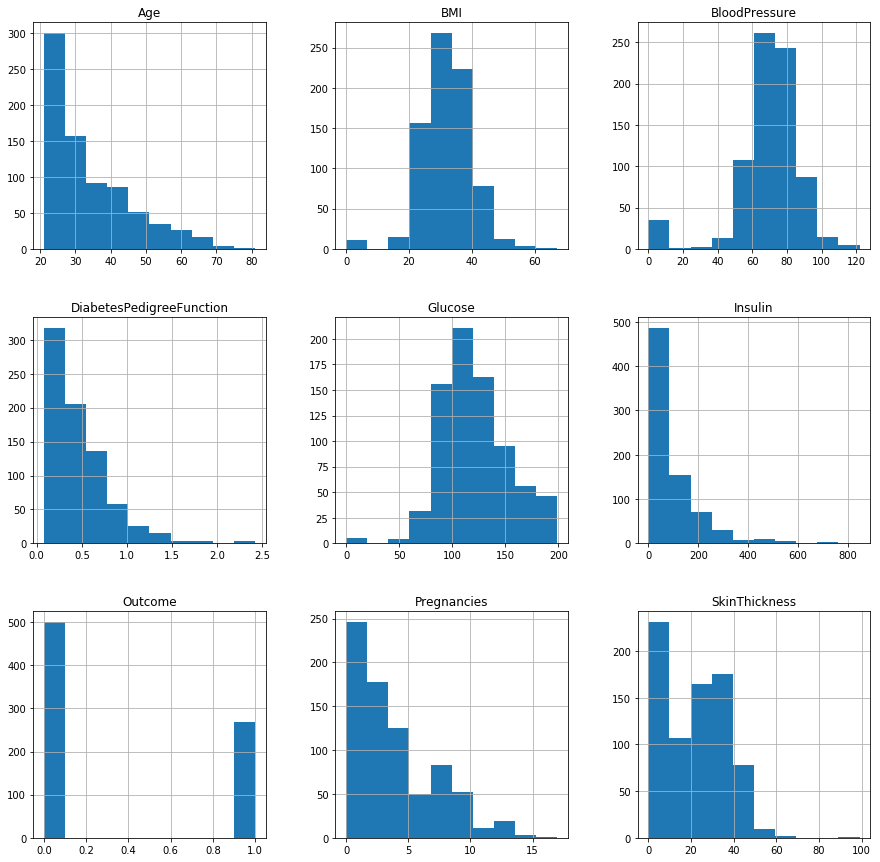

In [14]:
#for x in df.columns:    
   # df.hist(x)
    
df.hist(figsize=(15,15), xlabelsize = 10);

In [15]:


#Pregnancies - Most of the women never got pregnant or got pregnant less number of times and very few women got highest numbers of time pregnant i.e 17.The data is right skewed.
#Glucose - Most of the patients having high glucose level.
#BloodPressure - Data is in good normalized shape but the value 0 is invalid and a very few patients have very high BP
#SkinThickness - Data is left skewed. More patients have thin skin in the dataset.
#Insuling - The data is highly right skewed there are certain patients with extremely high Insulin level in the dataset. 
            # The data distribution is not in a good shape because of the 0 value.
#BMI - Here again 0 is invalid value making the data showing more number of patients with lesser BMI value.
#DiabetesPedigreeFunction - the distribution is not in a good shape. There are many outliers with the real high value of the function comparetively.
#Age - Most of the patients are of higher age than the average age.


Lets treat the missing values i.e(0)

#Missing values 
• Glucose :5
• BloodPressure :35
• SkinThickness :227
• Insulin:374
• BMI : 11

In [16]:
df['Glucose'].replace(0,np.nan,inplace = True)
df['BloodPressure'].replace(0,np.nan,inplace = True)
df['SkinThickness'].replace(0,np.nan,inplace = True)
df['Insulin'].replace(0,np.nan,inplace = True)
df['BMI'].replace(0,np.nan,inplace = True)

In [17]:
df['Glucose'].fillna(df['Glucose'].median(),inplace = True)
df['BloodPressure'].fillna(df['Glucose'].median(),inplace = True)
df['SkinThickness'].fillna(df['Glucose'].median(),inplace = True)
df['Insulin'].fillna(df['Glucose'].median(),inplace = True)
df['BMI'].fillna(df['Glucose'].median(),inplace = True)

In [18]:
df.describe().T.iloc[1:6,1:6]

,mean,std,min,25%,50%
Glucose,121.656250,30.438286,44.0,99.75,117.0
BloodPressure,74.437500,15.262202,24.0,64.00,73.0
SkinThickness,55.118490,41.062553,7.0,25.00,35.0
Insulin,136.776042,87.179770,14.0,117.00,117.0
BMI,33.668359,12.178062,18.2,27.50,32.4


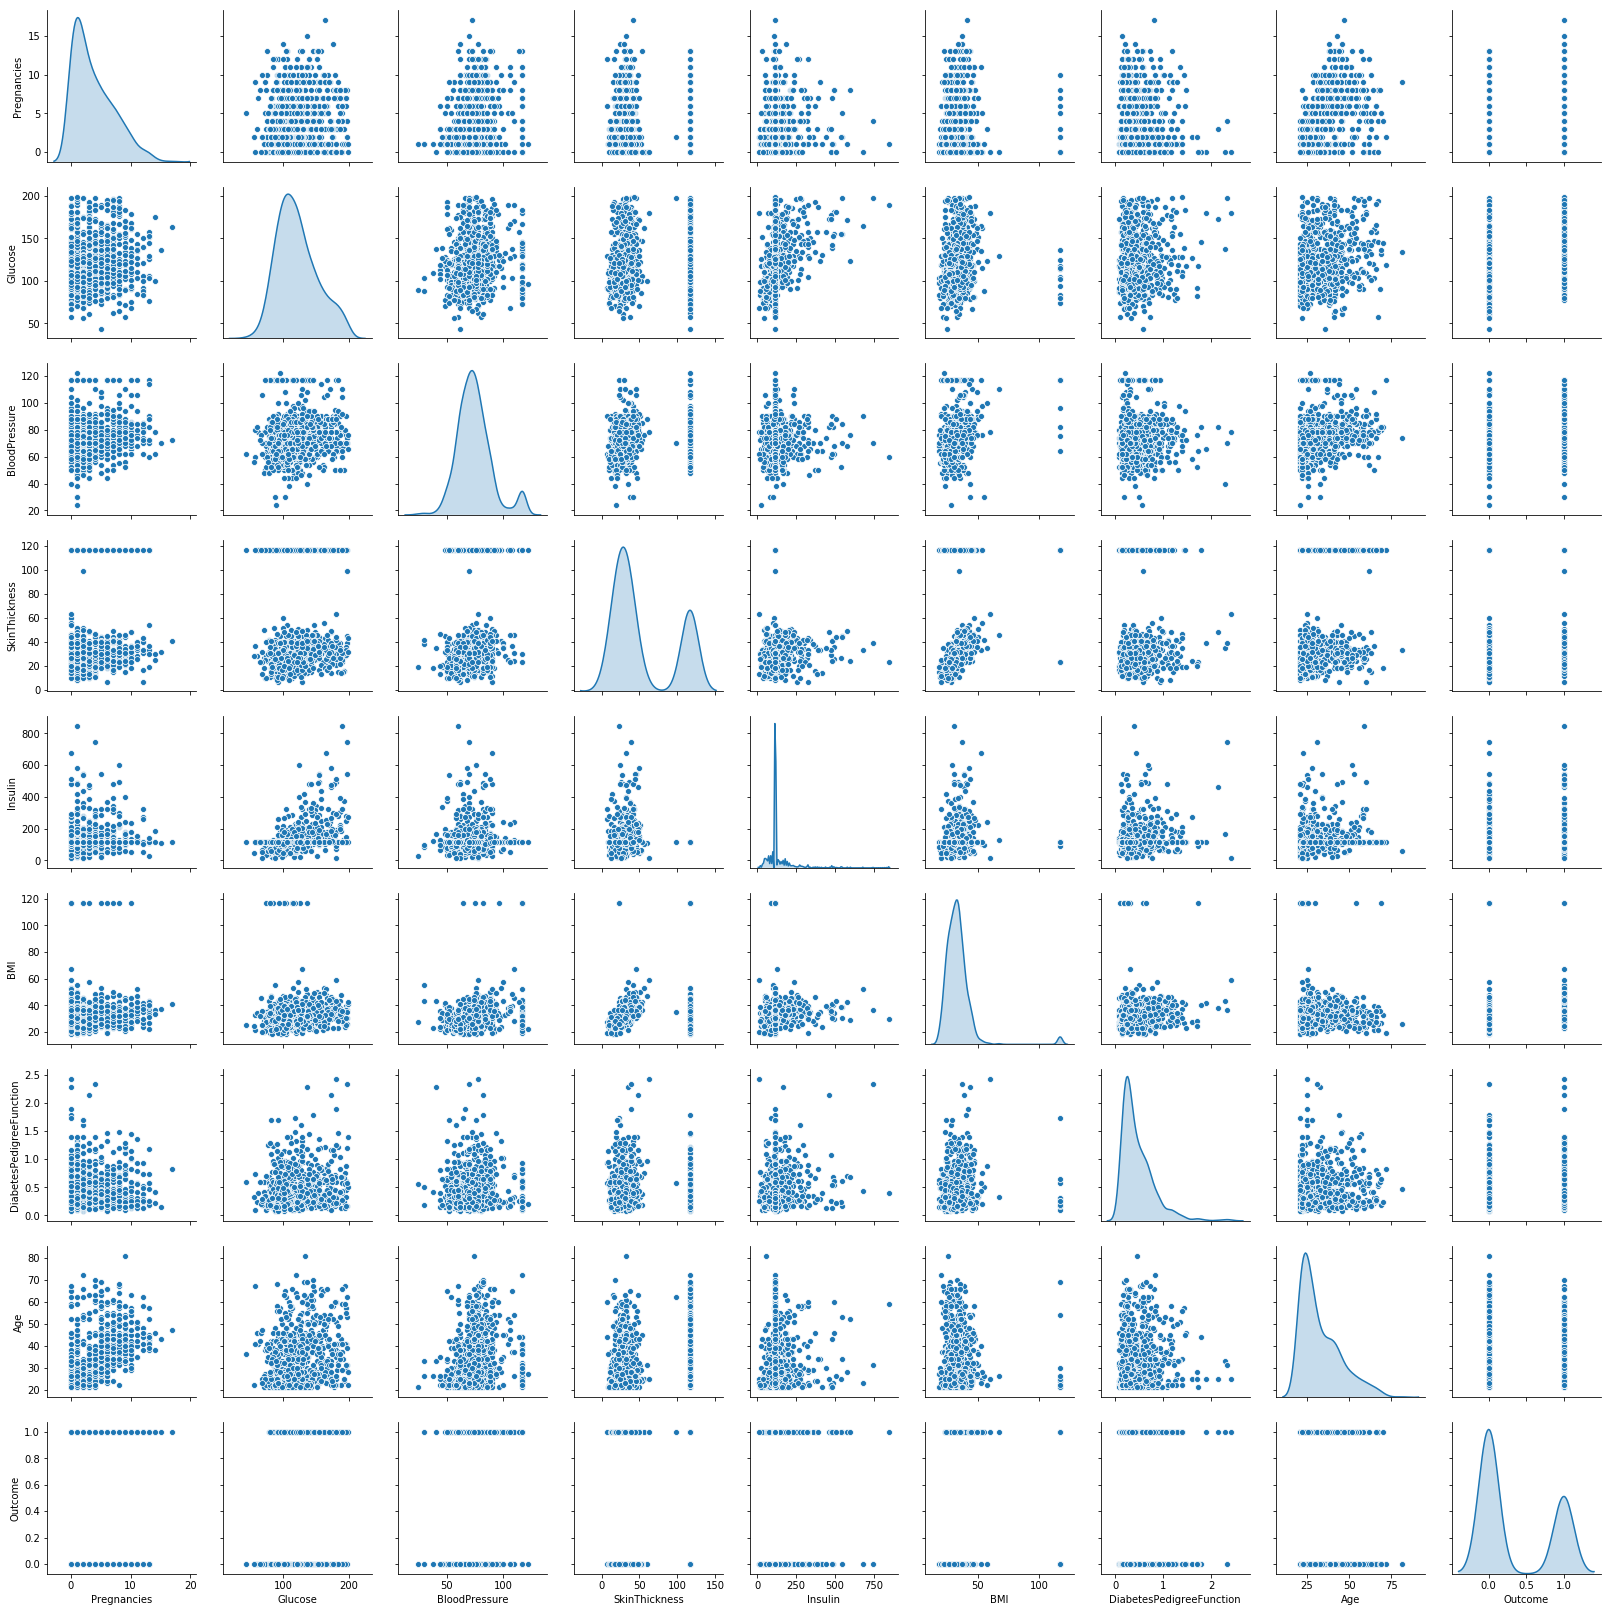

In [19]:
sns.pairplot(df, diag_kind='kde')

###### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
#Pregnancies - int64 datatype
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [22]:
#df['Pregnancies'].value_counts()
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


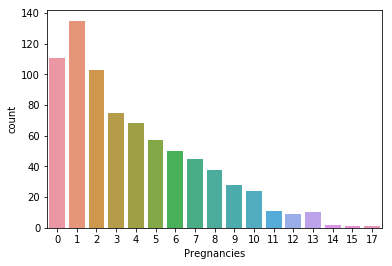

In [23]:
sns.countplot(df['Pregnancies'])

In [24]:
#Glucose float64  - Though the count plot is generally suitable for the categorical variable.
df['Glucose'].value_counts()

99.0     17
100.0    17
117.0    16
129.0    14
106.0    14
111.0    14
125.0    14
105.0    13
95.0     13
112.0    13
102.0    13
108.0    13
122.0    12
109.0    12
124.0    11
120.0    11
90.0     11
128.0    11
114.0    11
107.0    11
119.0    11
115.0    10
84.0     10
92.0      9
126.0     9
91.0      9
88.0      9
146.0     9
97.0      9
123.0     9
         ..
159.0     2
153.0     2
193.0     2
157.0     2
75.0      2
77.0      2
175.0     2
170.0     2
195.0     2
76.0      2
174.0     2
56.0      1
191.0     1
177.0     1
199.0     1
190.0     1
65.0      1
198.0     1
67.0      1
44.0      1
186.0     1
172.0     1
72.0      1
61.0      1
178.0     1
182.0     1
169.0     1
160.0     1
62.0      1
149.0     1
Name: Glucose, Length: 135, dtype: int64

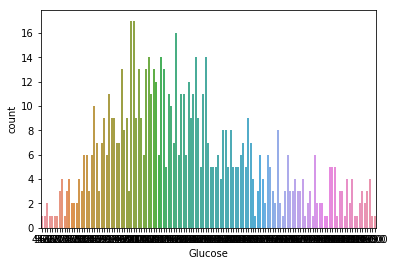

In [25]:
sns.countplot(df['Glucose'])

#Here we see that the maximum count is going till 17.

In [26]:
#BloodPressure - float64
df['BloodPressure'].value_counts()

70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
117.0    35
62.0     34
82.0     30
66.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
54.0     11
52.0     11
92.0      8
75.0      8
65.0      7
85.0      6
94.0      6
48.0      5
44.0      4
96.0      4
110.0     3
106.0     3
98.0      3
100.0     3
108.0     2
30.0      2
55.0      2
104.0     2
46.0      2
122.0     1
95.0      1
102.0     1
61.0      1
40.0      1
24.0      1
38.0      1
114.0     1
Name: BloodPressure, dtype: int64

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\Paridhi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


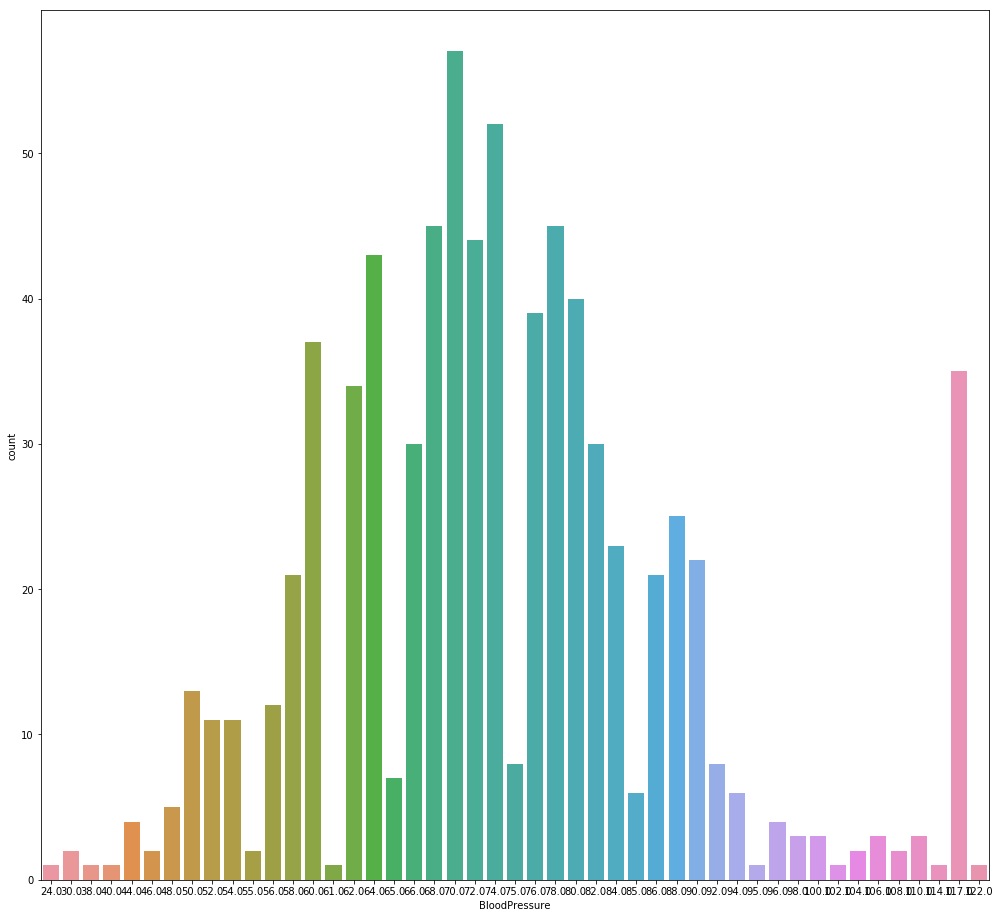

In [30]:
%pylab
figsize(17,16)
sns.countplot(df['BloodPressure'])

# We are seeing that the highest count is 57 for the 70.0 value.

In [31]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [32]:
df['SkinThickness'].value_counts()

117.0    227
32.0      31
30.0      27
27.0      23
23.0      22
33.0      20
28.0      20
18.0      20
31.0      19
19.0      18
39.0      18
29.0      17
37.0      16
40.0      16
22.0      16
25.0      16
26.0      16
41.0      15
35.0      15
17.0      14
36.0      14
15.0      14
20.0      13
24.0      12
42.0      11
13.0      11
21.0      10
34.0       8
46.0       8
38.0       7
12.0       7
11.0       6
16.0       6
43.0       6
45.0       6
14.0       6
10.0       5
44.0       5
48.0       4
47.0       4
50.0       3
49.0       3
8.0        2
54.0       2
7.0        2
52.0       2
63.0       1
56.0       1
51.0       1
60.0       1
99.0       1
Name: SkinThickness, dtype: int64

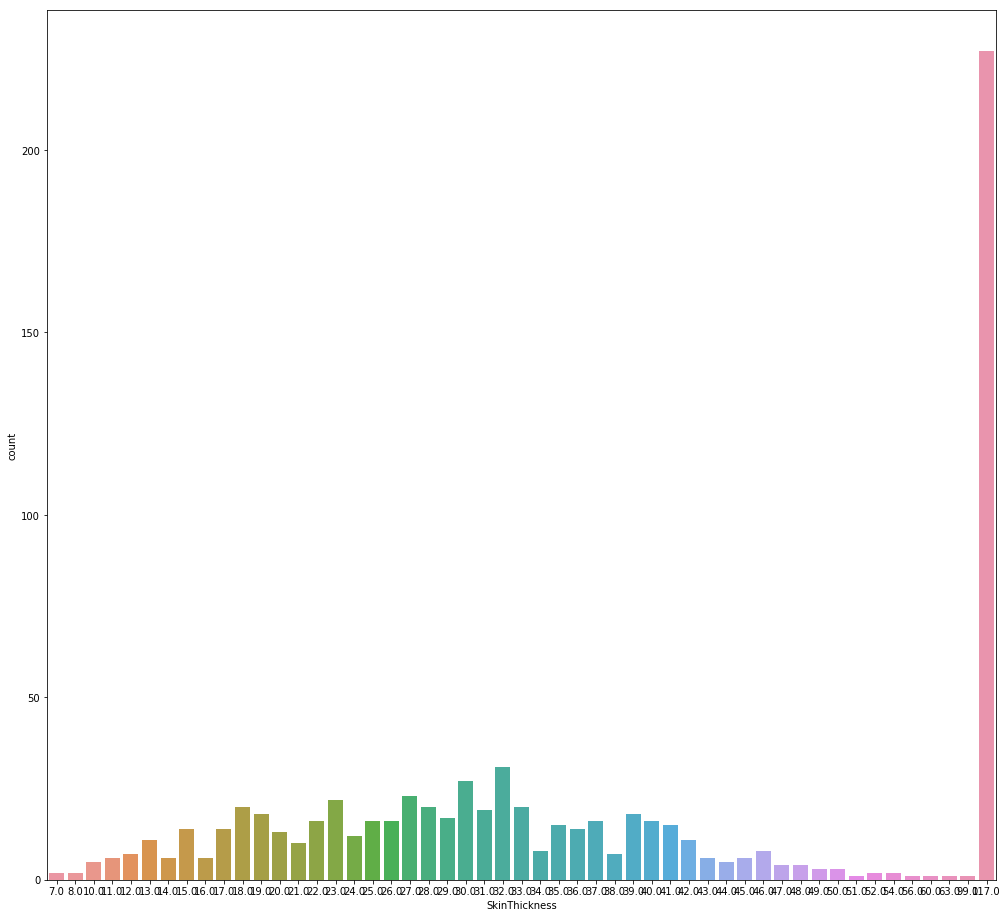

In [33]:
sns.countplot(df['SkinThickness'])

In [34]:
df['Insulin'].value_counts()

117.0    374
105.0     11
140.0      9
130.0      9
120.0      8
94.0       7
100.0      7
180.0      7
110.0      6
135.0      6
115.0      6
56.0       5
49.0       5
66.0       5
76.0       5
210.0      5
71.0       4
64.0       4
90.0       4
168.0      4
165.0      4
160.0      4
155.0      4
125.0      4
54.0       4
88.0       4
200.0      4
190.0      4
50.0       3
75.0       3
        ... 
59.0       1
387.0      1
84.0       1
89.0       1
43.0       1
108.0      1
73.0       1
52.0       1
68.0       1
29.0       1
250.0      1
188.0      1
545.0      1
65.0       1
112.0      1
16.0       1
127.0      1
178.0      1
392.0      1
22.0       1
440.0      1
46.0       1
91.0       1
15.0       1
272.0      1
41.0       1
25.0       1
600.0      1
166.0      1
72.0       1
Name: Insulin, Length: 186, dtype: int64

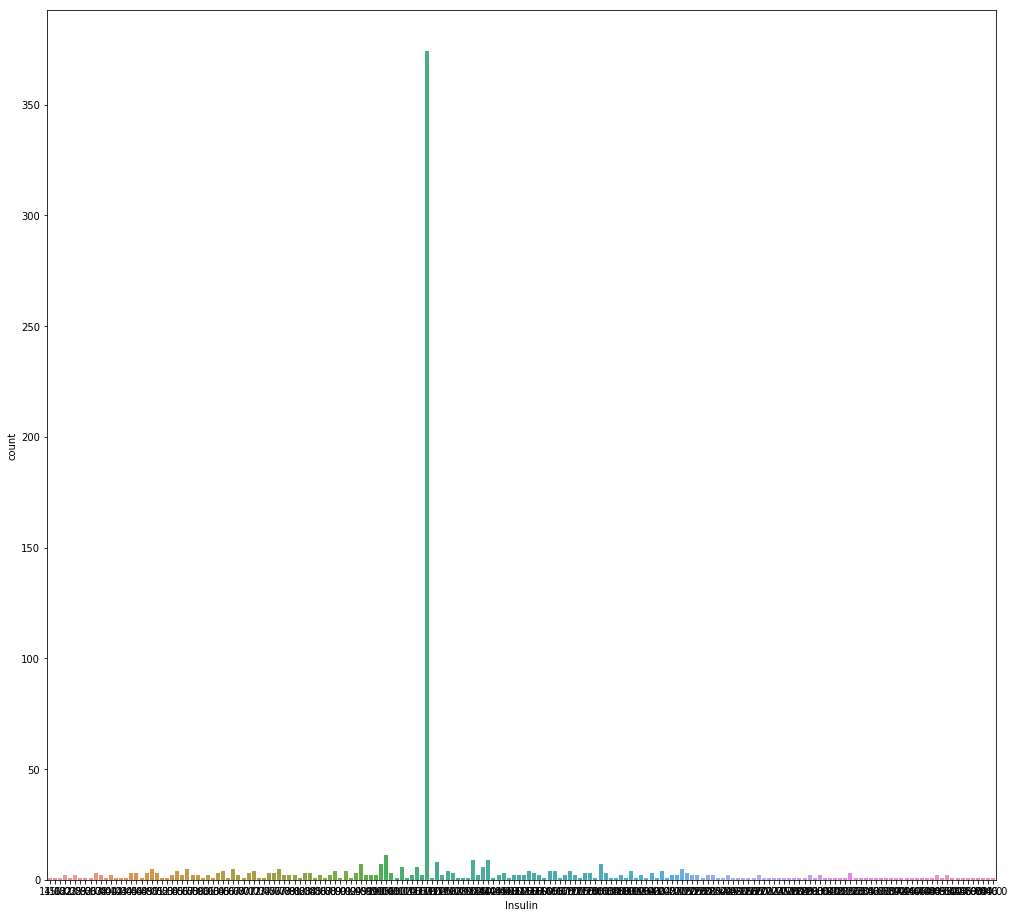

In [35]:
sns.countplot(df['Insulin'])

In [36]:
#BMI - float 64
df['BMI'].value_counts()

32.0     13
31.6     12
31.2     12
117.0    11
33.3     10
32.4     10
32.8      9
30.8      9
32.9      9
30.1      9
29.7      8
33.6      8
34.2      8
30.4      7
35.5      7
27.6      7
33.2      7
28.7      7
25.9      7
39.4      7
30.0      7
30.5      7
27.8      7
25.2      6
36.8      6
28.9      6
34.9      6
24.2      6
34.3      6
38.5      6
         ..
21.7      1
21.2      1
43.1      1
45.4      1
40.7      1
45.2      1
24.1      1
44.1      1
29.2      1
38.6      1
67.1      1
41.2      1
26.7      1
48.8      1
49.6      1
46.7      1
41.8      1
22.7      1
24.9      1
40.8      1
57.3      1
31.1      1
53.2      1
46.3      1
36.2      1
32.1      1
52.9      1
31.3      1
45.7      1
42.8      1
Name: BMI, Length: 248, dtype: int64

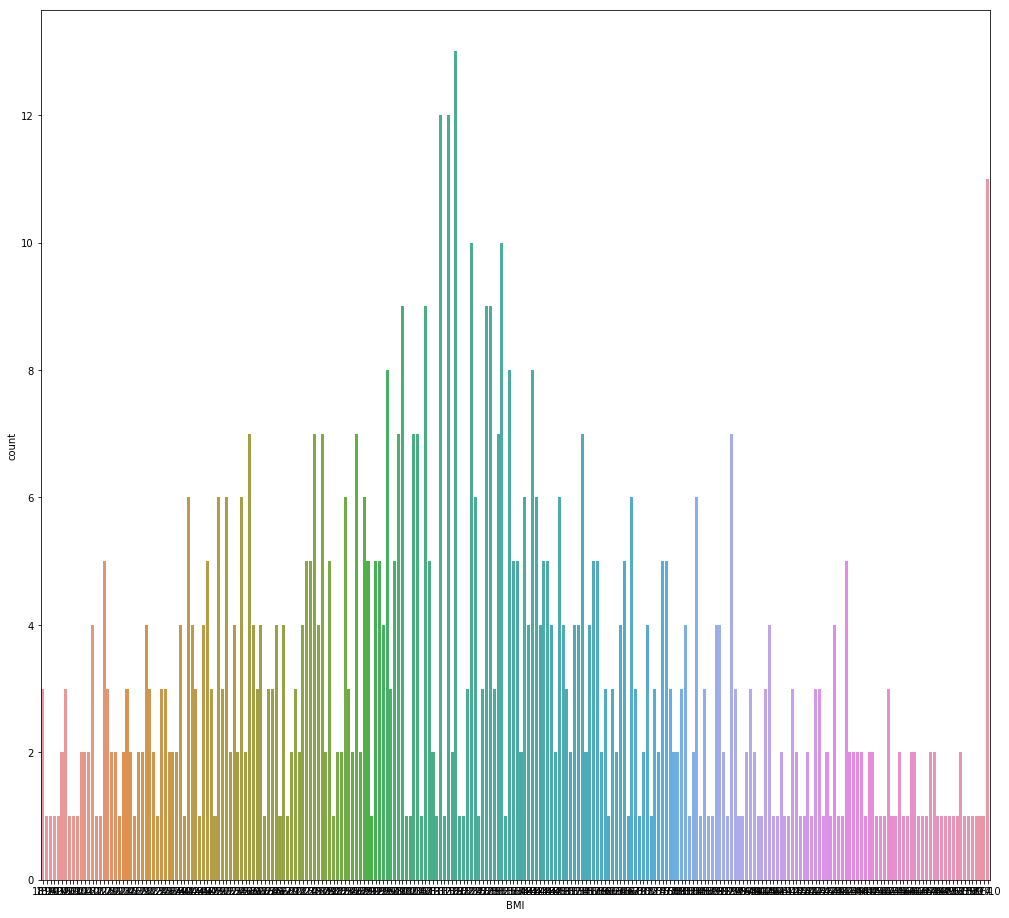

In [37]:
sns.countplot(df['BMI'])

In [38]:
df['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
0.268    5
0.261    5
0.167    4
0.190    4
0.270    4
0.687    4
0.237    4
0.263    4
0.284    4
0.245    4
0.260    4
0.692    4
0.304    4
0.299    4
0.551    4
0.197    4
0.349    3
0.205    3
0.256    3
0.187    3
0.337    3
0.142    3
0.422    3
0.340    3
0.389    3
        ..
0.725    1
0.325    1
0.239    1
1.258    1
0.331    1
0.096    1
0.832    1
0.454    1
0.546    1
0.704    1
0.398    1
0.711    1
0.547    1
0.426    1
0.491    1
0.503    1
0.867    1
0.944    1
0.743    1
0.666    1
0.420    1
0.588    1
1.144    1
0.593    1
0.162    1
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

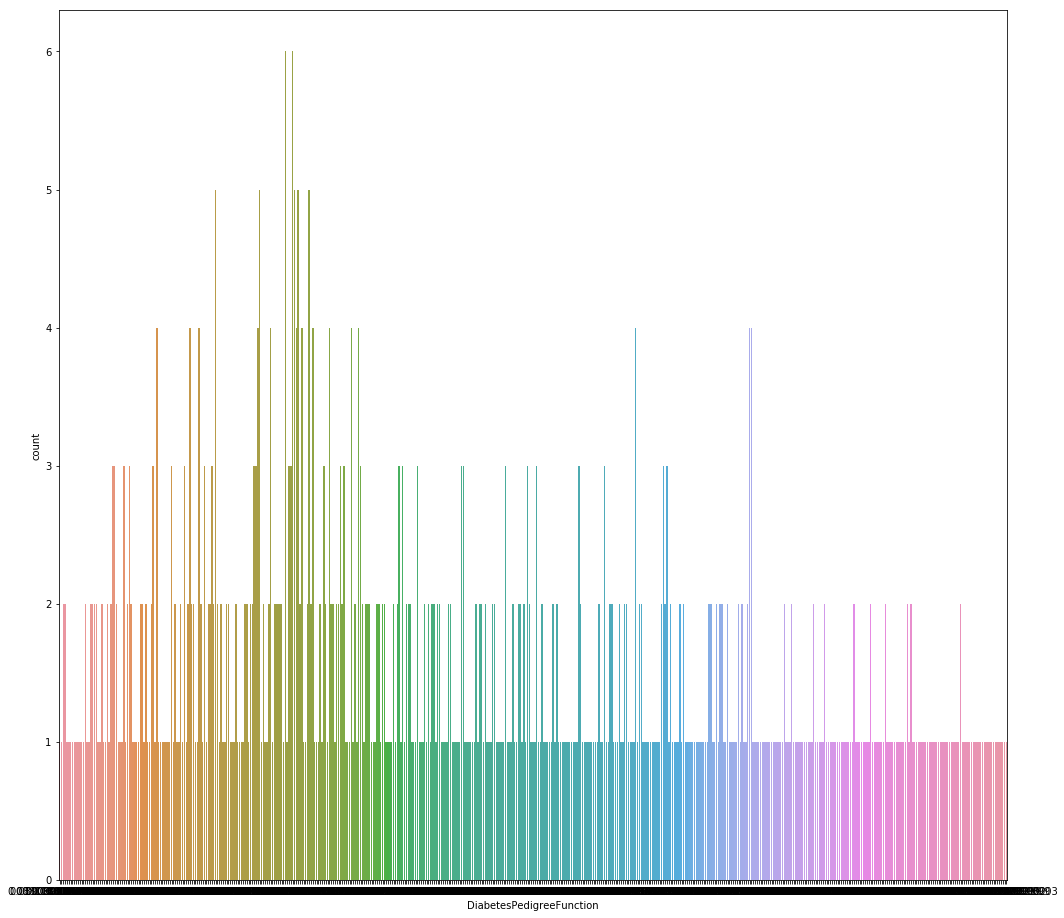

In [39]:
sns.countplot(df['DiabetesPedigreeFunction'])

In [40]:
#int64
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

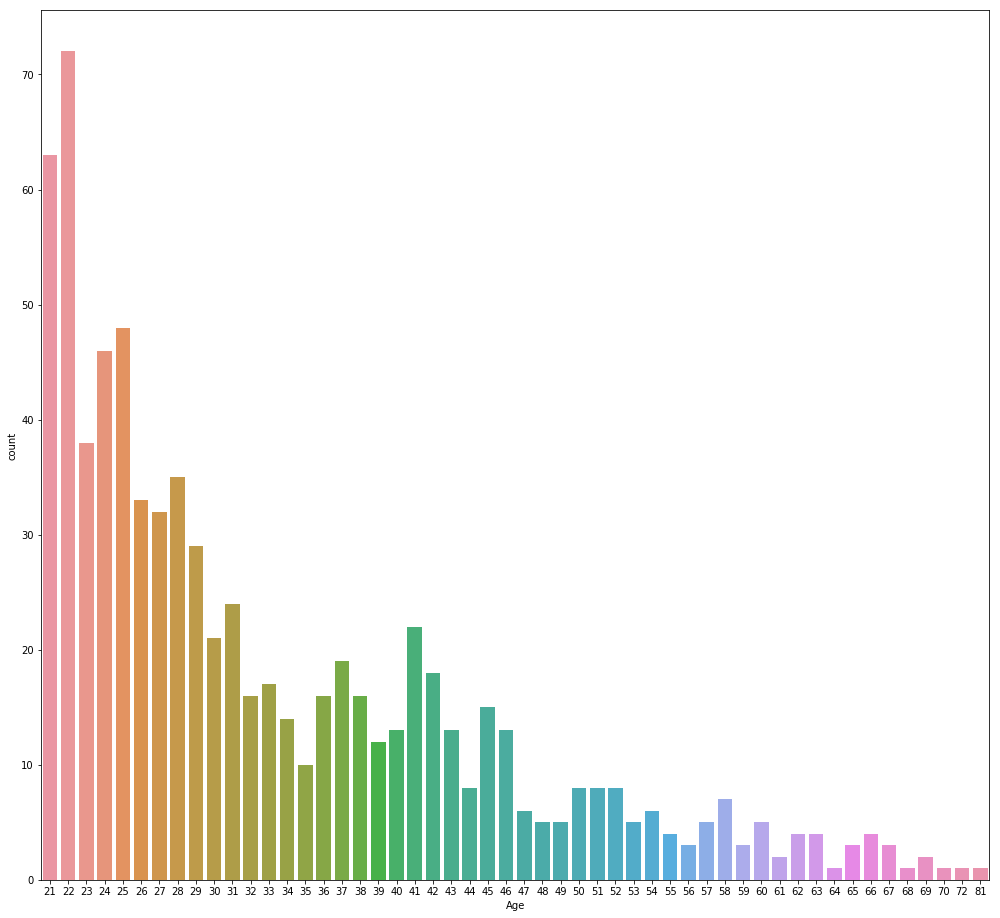

In [41]:
sns.countplot(df['Age'])

In [42]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [43]:
Class 1 - is under representation - Which is out class of interest - Patient is diabetic

SyntaxError: invalid syntax (<ipython-input-43-26ffe856614b>, line 1)

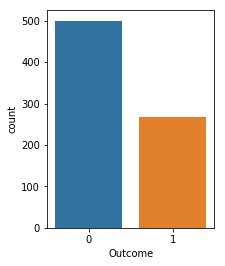

In [44]:
figsize(3,4)
sns.countplot(df['Outcome'])

## Project Task: Week 2

Data Exploration:

###### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

As we saw above the the target column is having class 1 under representation means less data is present for this class. Hence, 
the various classification algorithms will be baised in this case. Meaning that it will think go to make error for the minor class and do all correct prediction for the majority class. Therefore, we can't consider only over all accuracy we have to check the class level accuracies.
Also, there are some techniques to deal with this kind of data like upsampling and downsampling.


###### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

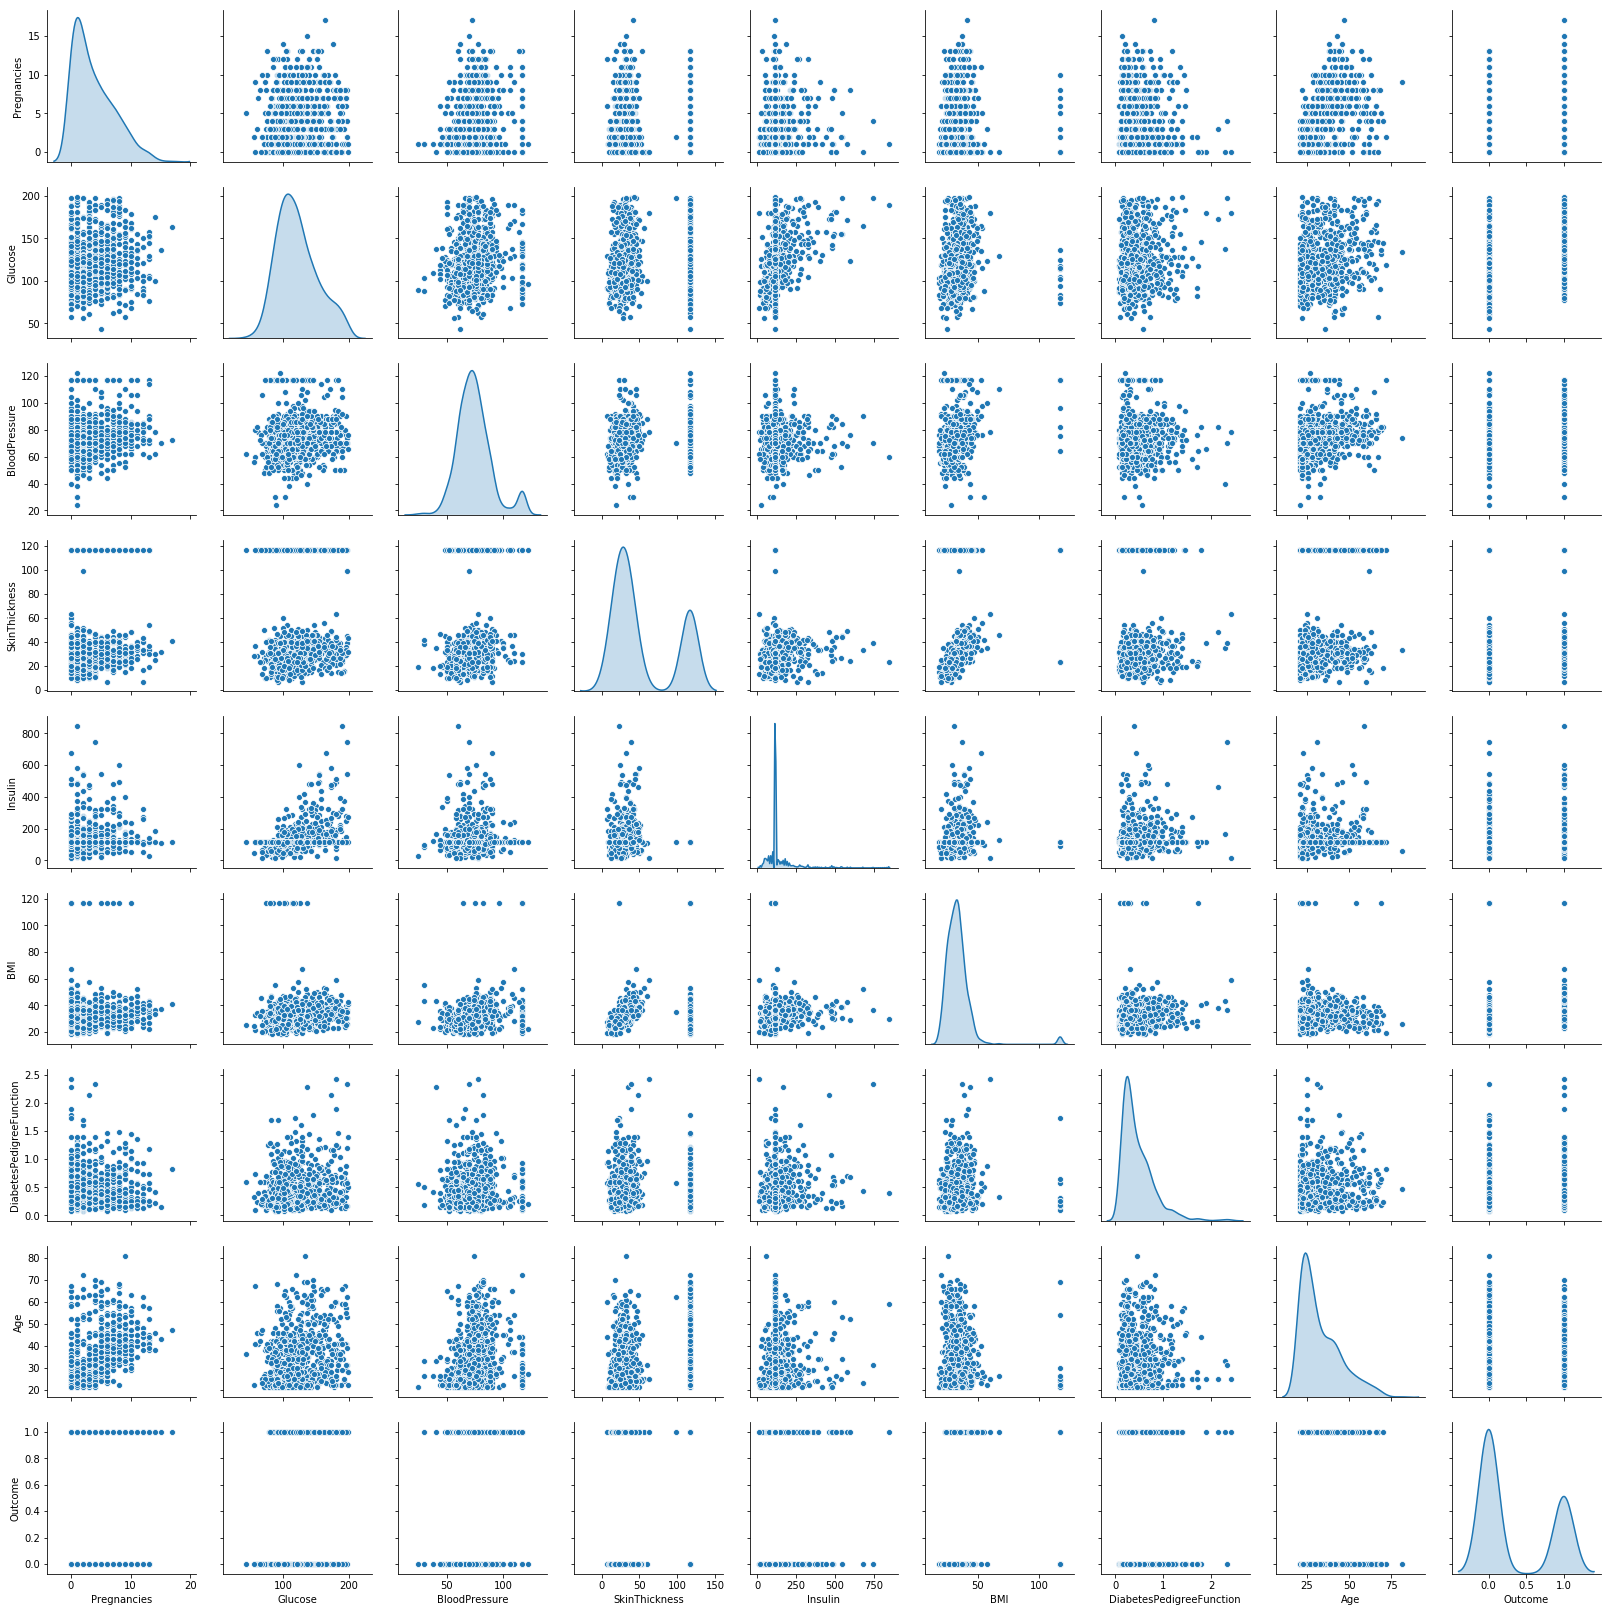

In [45]:
sns.pairplot(df,diag_kind = 'kde')

The various attributes seems to have very low correlation among each other which is good as we will be not feeding model same information again.

Only between skin & BMI - a little correlation is visible.


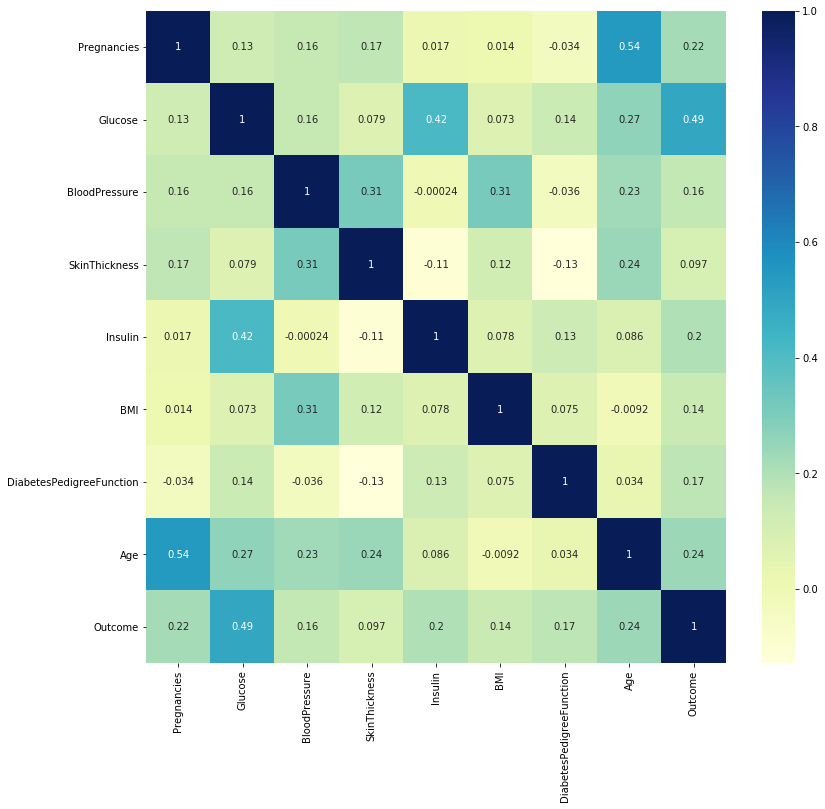

In [46]:
figsize(13,12)
corr= df.corr()
sns.heatmap(corr, 
            annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu")

Glucose then BMI are the best attributes for the Outcome prediction.

# Project Task: Week 3

Data Modeling:

###### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Step 1: Split the data into train and test data.
Step 2: We will scale the dimensions we need scale function which is part of sckikit preprocessing libraries
Step 3: We will fit and transform the model object with the LogisticRegression algorithm or SVM algorithm on the train data.
Step 4: We will make prediction on the test data.
Step 5: Compare the performance of the various models we tried.
Step 6:Plot matrices to judge the model performance.


In [48]:
#Lets assign the features to the X variable and the response to the y variable 
X = df.iloc[:,0:8]
y = df.Outcome

In [49]:
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [50]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


###### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

LogisticRegression Model

In [71]:
LogReg = LogisticRegression(solver = 'liblinear')
LogReg.fit(X_train, y_train)
y_predict_LogReg = LogReg.predict(X_test)
LogReg_score = LogReg.score(X_test, y_test)
#print("LogisticRegressor model accuracy is :",LogReg_score)


Support Vector Classifier

In [72]:
Svc_model = SVC(probability=True)
Svc_model.fit(X_train, y_train)
y_predict_Svc = Svc_model.predict(X_test)
Svc_model_score = Svc_model.score(X_test, y_test)
#print("Support Vector Classifier model accuracy is :",Svc_model_score)

KNeighborsClassifier Model

In [80]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
y_predict_KNN = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
#print("KNeighborsClassifier Model model accuracy is :",KNN_model_score)

0.8324022346368715


Train Score

In [82]:
print("LogReg Train set score",LogReg.score(X_train, y_train))
print("SVC Train set score",Svc_model.score(X_train, y_train))
print("KNN Train set score",KNN_model.score(X_train, y_train))

LogReg Train set score 0.7728119180633147
SVC Train set score 0.8230912476722533
KNN Train set score 0.8324022346368715


Test Score

In [76]:
from tabulate import tabulate
print(tabulate([['SVC', Svc_model_score],['LogReg',LogReg_score ],['KNN', KNN_model_score]], headers=['Algorithms', 'Score']))

Algorithms       Score
------------  --------
SVC           0.787879
LogReg        0.766234
KNN           0.731602


LR: 0.752666 (0.056062)
KNN: 0.731733 (0.047481)
SVM: 0.651025 (0.072141)


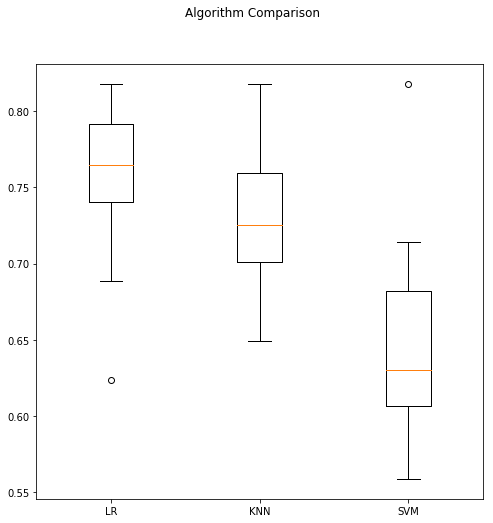

In [59]:
import sklearn
print('sklearn: %s' % sklearn.__version__)
from sklearn import model_selection 
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
figsize(8,8)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

## Project Task: Week 4

#### Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

##### Logistic Regression Classification Report

In [77]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report: ")
print(classification_report(y_test,y_predict_LogReg))
print('\n')
print("Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, y_predict_LogReg))
conf_matrix = metrics.confusion_matrix(y_test, y_predict_LogReg)


Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       146
           1       0.75      0.54      0.63        85

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



Confusion Matrix : 
[[131  15]
 [ 39  46]]


In [65]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print("Logistic Regression Classification report :\n")
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
    
confusion_metrics (conf_matrix)

Logistic Regression Classification report :

True Positives: 46
True Negatives: 131
False Positives: 15
False Negatives: 39
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
Sensitivity: 0.54
Specificity: 0.9
Precision: 0.9
f_1 Score: 0.68


##### Support Vector Classification Report :

In [66]:
#SupportVectorClassifier
print("Classification Report: ")
print(classification_report(y_test,y_predict_Svc))
print('\n')
print("Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, y_predict_Svc))

conf_matrix = metrics.confusion_matrix(y_test, y_predict_Svc)

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       146
           1       0.81      0.55      0.66        85

   micro avg       0.79      0.79      0.79       231
   macro avg       0.80      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231



Confusion Matrix : 
[[135  11]
 [ 38  47]]


In [67]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print("Support Vector Classifier report :\n")
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (conf_matrix)

Support Vector Classifier report :

True Positives: 47
True Negatives: 135
False Positives: 11
False Negatives: 38
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.55
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.69


##### KNeighborsClassifier Classification Report

In [68]:
#KNN
print("Classification Report: ")
print(classification_report(y_test,y_predict_KNN))
print('\n')
print("Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, y_predict_KNN))

conf_matrix = metrics.confusion_matrix(y_test, y_predict_KNN)

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       146
           1       0.67      0.53      0.59        85

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.73      0.72       231



Confusion Matrix : 
[[124  22]
 [ 40  45]]


In [69]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print("KNeighborsClassifier Classification report :\n")
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics (conf_matrix)

KNeighborsClassifier Classification report :

True Positives: 45
True Negatives: 124
False Positives: 22
False Negatives: 40
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.53
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.65


High precision value, recall >0.5, and high F1 score indicate the good performance of the model.

TN means actual non diabetic are correclty predicted the same.

TP actual diabetics are coreectly predicted the same

FP means non diabetics are predicted as diabetic which is incorrect.

FN means actual diabetics predicted incorrectly as non-diabetic


##### AUC (ROC curve)

ROC Curve Metrics
A Receiver Operating Characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds.

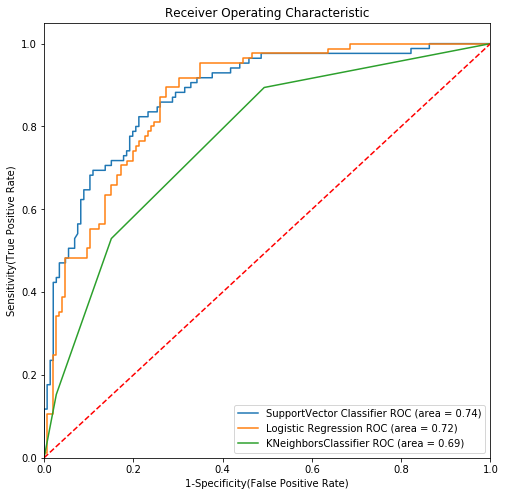

In [70]:
from sklearn import metrics
plt.figure()
#figsize(10,10)

fpr_l, tpr_l, thresholds_l = metrics.roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
fpr_s, tpr_s, thresholds_s = metrics.roc_curve(y_test, Svc_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, KNN_model.predict_proba(X_test)[:,1])

auc = metrics.roc_auc_score(y_test,Svc_model.predict(X_test))
plt.plot(fpr_s, tpr_s, label='%s ROC (area = %0.2f)' % ('SupportVector Classifier', auc))
auc = metrics.roc_auc_score(y_test,LogReg.predict(X_test))
plt.plot(fpr_l, tpr_l, label='%s ROC (area = %0.2f)' % ('Logistic Regression', auc))
auc = metrics.roc_auc_score(y_test,KNN_model.predict(X_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier', auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Maximum area under the curve is 0.74 i.e for SVC.

Least misclassification is performed by SVC.